In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, SpectralEmbedding
from ast import literal_eval
from sklearn import preprocessing
# get all possible labels
labels = []
with open('bottleneck_embedding/abbreviations.json') as fd:
     abbs = json.load(fd)
fd.close()
for k,v in abbs.items():
    labels.append(v[0])
#labels dict 
l_dict = {x:0 for x in labels}

In [244]:
def plotly_able_df(df,num_d=3,mapper=tsne):
#     df["feats"] = df["feats"].apply(literal_eval)
    X = df["feats"]
    X = X.fillna(0)
    #convert series of arrays into a numpy array
    X = pd.DataFrame(X.to_list()).to_numpy()
    X = min_max_scaler.fit_transform(X)

#     time_start = time.time()

    X_2d = mapper.fit_transform(X)
    
    if num_d==2:
        df2 = pd.concat([df["label"],pd.Series(X_2d[:,0]),pd.Series(X_2d[:,1])],axis=1)
        df2.columns=["label","D1","D2"]
    if num_d==3:
        df2 = pd.concat([df["label"],pd.Series(X_2d[:,0]),pd.Series(X_2d[:,1]),pd.Series(X_2d[:,2])],axis=1)
        df2.columns=["label","D1","D2","D3"]
    
    df2.label = df2.label.astype('str')
    return df2


In [246]:
labels_idx = pd.read_csv("bottleneck_embedding/metadata.tsv",sep='\t',names=["labels"])
codes = pd.read_csv("bottleneck_embedding/tensors.tsv",sep='\t',header = None)
temp_df = pd.DataFrame(columns=["feats","label"])

counter = 0
# for i in range(len(codes)):
for i in range(len(codes)):
    v = eval(labels_idx.loc[i].values[0])
    c = codes.loc[i].values
    if len(v) == 1:
        temp_df.loc[len(temp_df)] = [c,v[0]]



[t-SNE] Computing 601 nearest neighbors...
[t-SNE] Indexed 1968 samples in 0.025s...
[t-SNE] Computed neighbors for 1968 samples in 4.102s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1968
[t-SNE] Computed conditional probabilities for sample 1968 / 1968
[t-SNE] Mean sigma: 0.636377
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.755764
[t-SNE] KL divergence after 1000 iterations: 0.487378


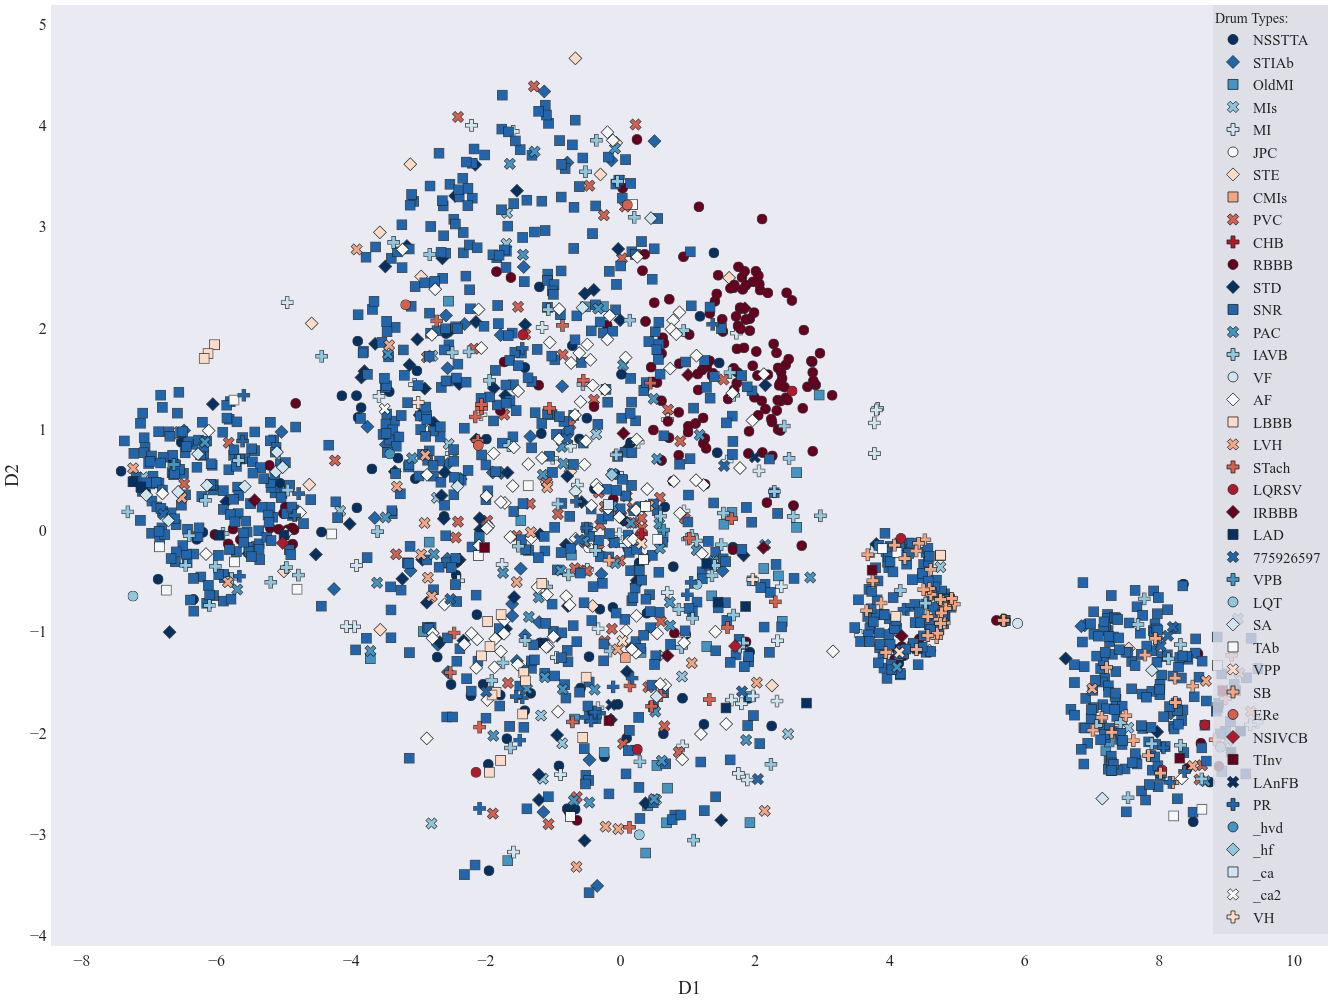

In [250]:
from kaleido.scopes.plotly import PlotlyScope
import plotly
import plotly.express as px
nd = 3
t = TSNE(n_components=nd, random_state=0, perplexity=200, verbose=1)
#t = Isomap(n_neighbors, n_components=num_d)
#t = LocallyLinearEmbedding(n_neighbors,n_components=num_d)
# t = SpectralEmbedding(n_neighbors=10,n_components=nd, random_state=1)
df = temp_df
df = plotly_able_df(df, mapper = t, num_d = nd,)
scope = PlotlyScope()

fig = px.scatter(df, x="D1",y="D2",color="label", symbol = 'label',
                    color_discrete_sequence= px.colors.sequential.RdBu_r)
# title_text='2 Dimensional Projection of Latent Variables'
fig.update_layout(
 autosize=False,title_text='',title=None,title_x=0.5, title_y=0.98,
                    template="seaborn",
                    width=1000,
                    height=1000, margin=dict( r=5, l=10, b=0, t=5),
                    font_family="Times New Roman",
                    font_size=16,
                    title_font_family="Times New Roman",
                    title_font_size=28,
                    legend=dict(bgcolor='rgba(220,220,230,0.8)',orientation="v",yanchor="top",y=1,xanchor="right",x=1,
                        font = dict(size=15),title_font = dict(size=14)),
                    legend_title_text="Drum Types:",
                )

fig.update_traces(marker=dict(size=10,opacity=1,line=dict(width=1,color='rgba(30,40,40,0.8)')))
fig.update_xaxes(showgrid=False,zeroline=False,)

fig.update_yaxes(showgrid=False,zeroline=False,)

g=fig
fig.show()
with open("t-SNE.pdf", "wb") as f:
    f.write(scope.transform(fig, format="pdf", width=1000,height=1000,  ))
